# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about the data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [1]:
# Unsupervised learning projects are more open ended.
# In this particular case, we want to discover clusters if any, and
# Identify outliers in the data and what features are pushing them to be outliers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wholesome_customers_data.csv')

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Shows that it is a small dataset with only 440 data points
# No data is missing

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=440, step=1)

## EDA

<Axes: xlabel='Milk', ylabel='Grocery'>

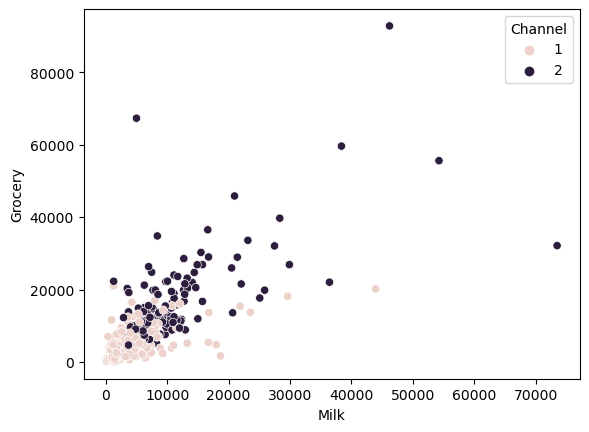

In [10]:
sns.scatterplot(x=df['Milk'],y=df['Grocery'],hue=df['Channel'])

In [11]:
# For Channel 1 users,their spending on Milk and Grocery is typically a lot less than channel 2 users
# Some datapoints should definately be outliers here

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Milk', ylabel='Count'>

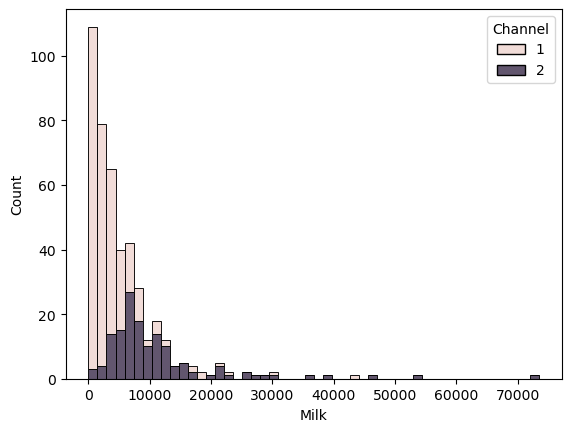

In [12]:
sns.histplot(x=df['Milk'],hue=df['Channel'],multiple='stack')

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Milk', ylabel='Count'>

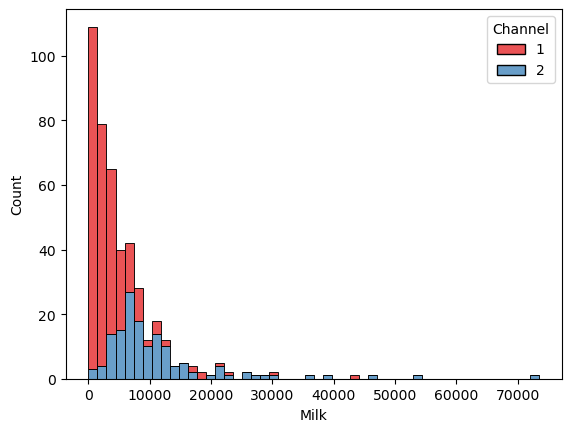

In [13]:
sns.histplot(x=df['Milk'],hue=df['Channel'],multiple='stack',palette='Set1')

In [14]:
# Channel 1 milk distribution seems to be much lower than channel 2.
# Lesser count in Channel 2

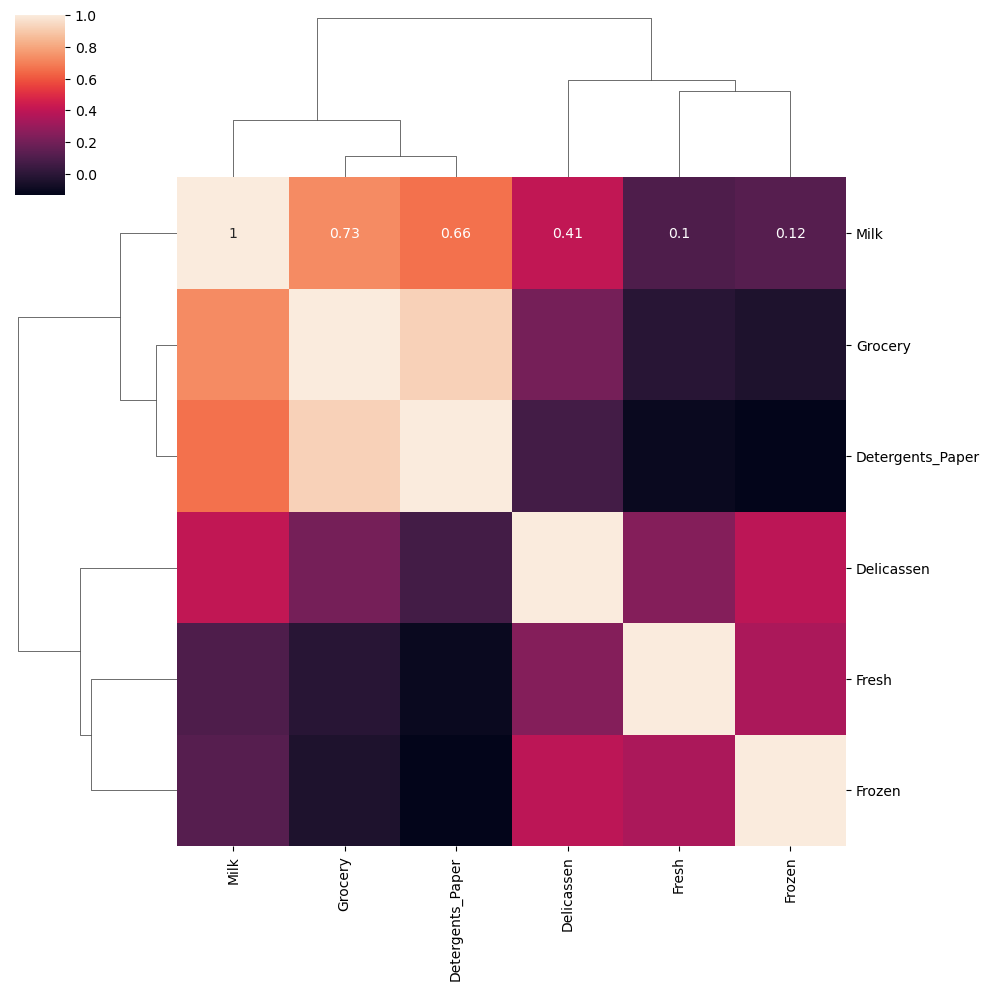

In [15]:
# Removing everything that is not a category.Not looking at channnel or region.
sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(),annot=True)

In [16]:
# Higher correlation between grocery and detergent paper
# It is essentially a duplicate across the diagonal.

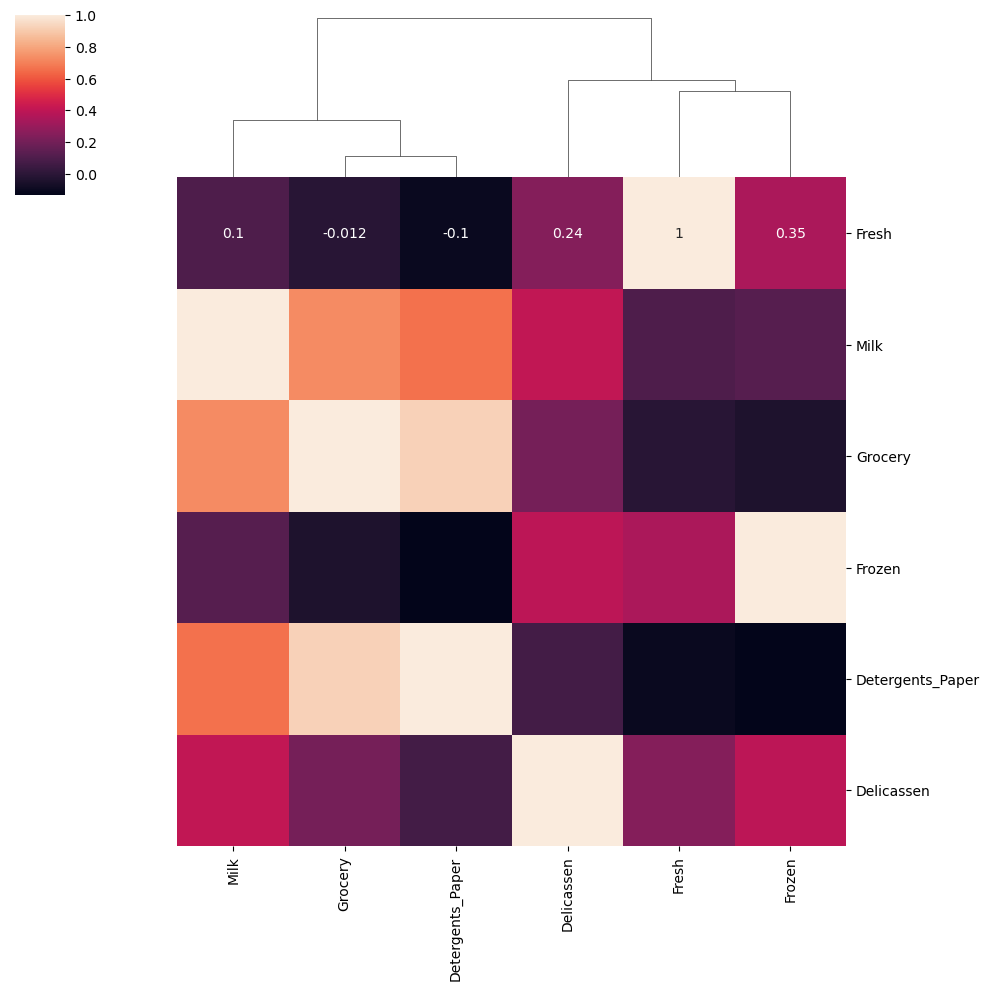

In [17]:
sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(),annot=True,row_cluster=False)


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

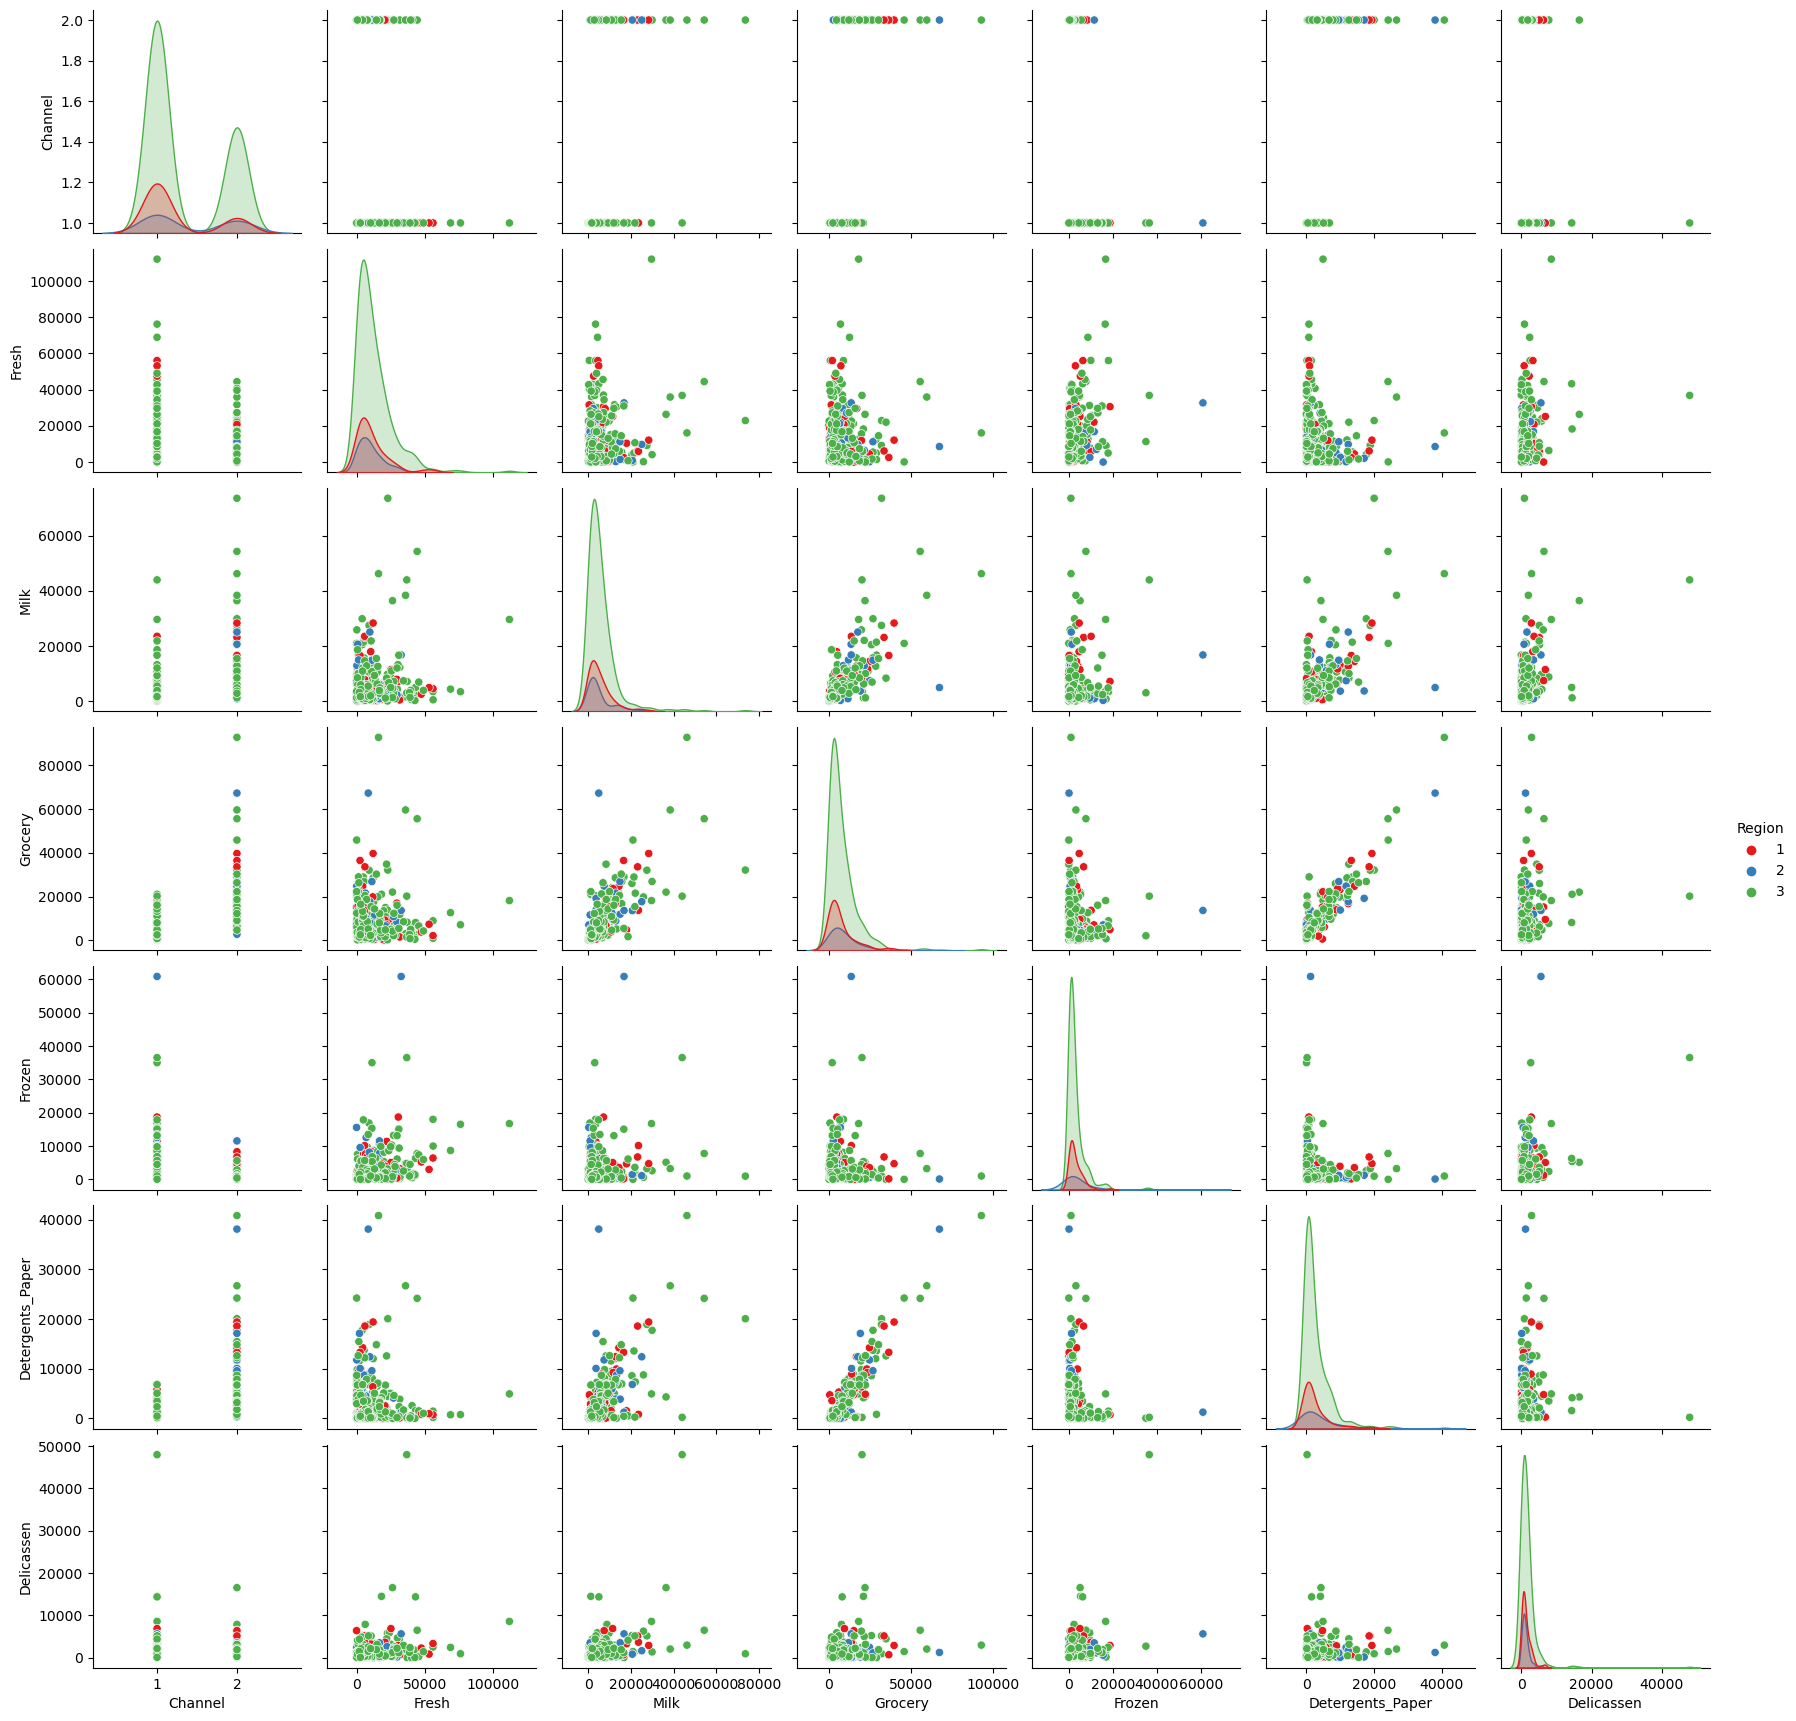

In [18]:
sns.pairplot(df,hue='Region',palette='Set1')

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

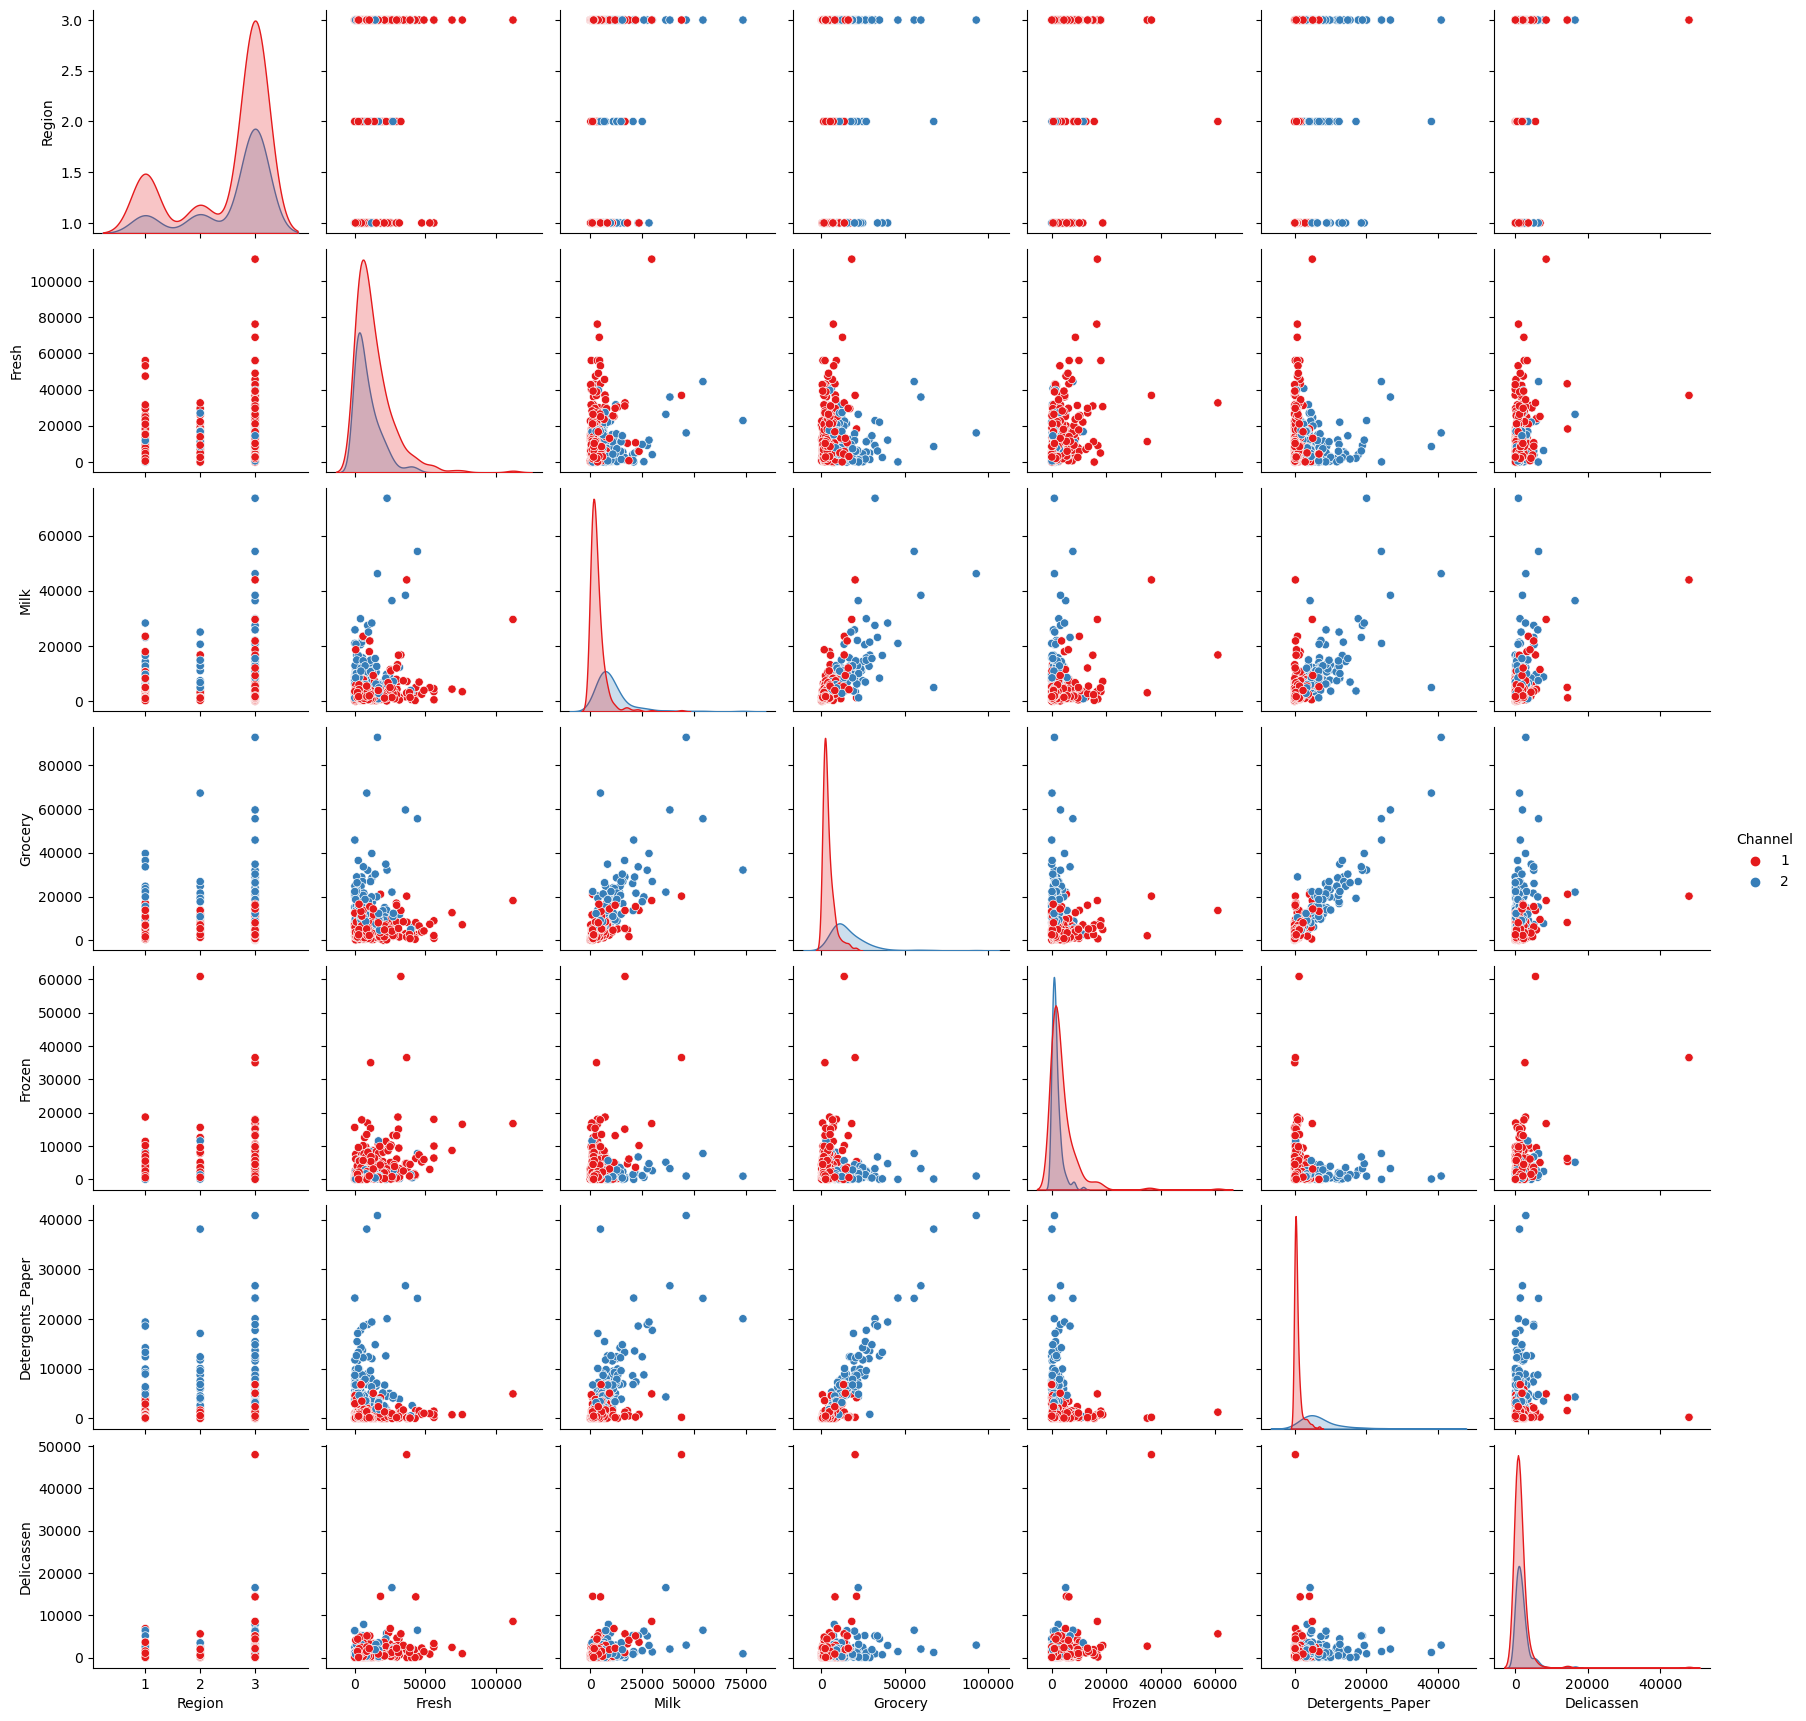

In [19]:
# Based on region alone, can't see any major difference
# Above scatterplot and histogram showed major differences between channels
# Setting hue = Channel, we'll be able to see difference in actual amount of spending


sns.pairplot(df,hue='Channel',palette='Set1')

In [20]:
# Now, can see distinct categories of spending
# Channel is more important than region for distinct qualifier of how much someone is spending.

## DBSCAN

The values of the features are in different orders of magnitude. Scaling becomes necessary.

In [21]:
# We didn't bothered changing region or channel into dummy variables because there really aren't that many channels to begin with.
# So, treating channel as one and two is not going to have a major effect from treating channel as a single column of zero or one and same for regions (Only three distinct region types).

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [22]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

Next, I'll use DBSCAN and a for loop to create a variety of models testing different epsilon values. 
For representation, setting min_samples equal to 2 times the number of features. 

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
scaled_X.shape

(440, 8)

In [25]:
scaled_X.shape[1] # It is giving no. of columns ie features

8

In [26]:
no_of_outliers = []
percent_outliers = []

for a in np.linspace(0.001,3,50):
    model = DBSCAN(eps=a,min_samples=2*scaled_X.shape[1])
    model.fit(scaled_X)
    no_of_outliers.append(np.sum(model.labels_ == -1))
    percent_outliers.append(100*np.sum(model.labels_ == -1)/len(model.labels_))

Creating a line plot of the percentage of outlier points versus the epsilon value choice.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Outliers vs Epsilon')

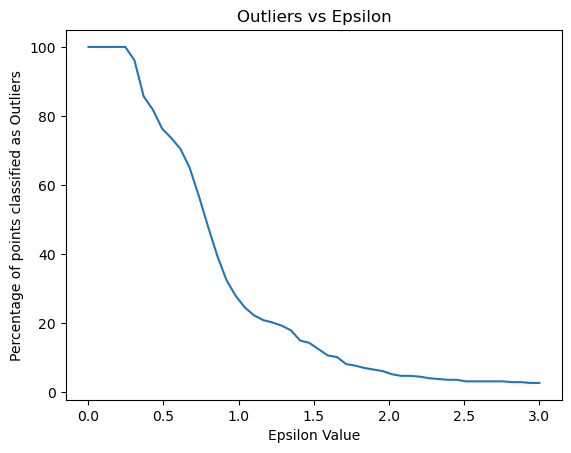

In [27]:
sns.lineplot(y=percent_outliers,x=np.linspace(0.001,3,50))
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of points classified as Outliers')
plt.title('Outliers vs Epsilon')

In [28]:
# Extremes of y-axis are useless
# Classifying everything as outliers is useless
# Classifying nothing as outliers is also useless
# For choosing a reasonable epsilon value,can talk to someone with domain experience that can tell what percentage of points should  be expected to be outliers here.
# From above plot, we are looking at inflection point where outliers begin to level off.
# Again, from above plot, can see it is somewhere between 2 and 3 epsilon.
# Choosing epsilon as 2

## DBSCAN with Chosen Epsilon

Based on the plot created above, will retrain a DBSCAN model with epsilon value = 2. 

In [29]:
dbscan = DBSCAN(eps=2, min_samples=scaled_X.shape[1])

In [30]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

In [31]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<Axes: xlabel='Grocery', ylabel='Milk'>

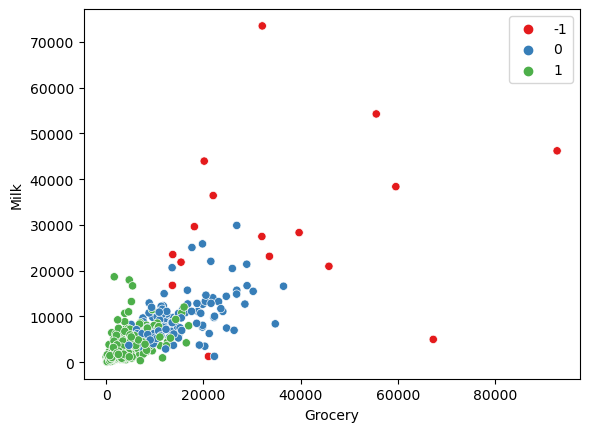

In [32]:
sns.scatterplot(y=df['Milk'],x=df['Grocery'],hue=dbscan.labels_,palette='Set1')

In [33]:
# It looks like some of these are outliers in possibly other spending categories that we couldn't quite tell just from looking at grocery and milk.
# Points even clear to naked eye has been correctly labelled as outliers.
# But DBSCAN is is also identifying as outliers points that are definately closer to typical spending pattern.
# This is because DBSCAN can look at all features at the same time whereas we are limited to 2 or 3 features depending upon how we are visualizing it.

Creating a scatterplot of Milk vs. Detergents Paper colored by the labels.

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

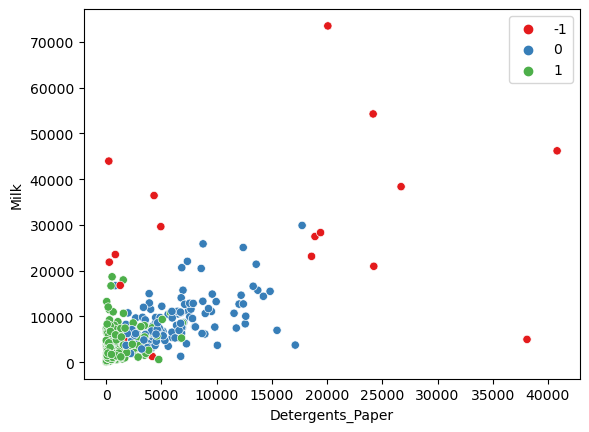

In [34]:
sns.scatterplot(y=df['Milk'],x=df['Detergents_Paper'],hue=dbscan.labels_,palette='Set1')

In [35]:
df['Labels'] = dbscan.labels_

In [36]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


Comparing the statistical mean of the clusters and outliers for the spending amounts on the categories.

In [37]:
df.drop(['Channel','Region'],axis=1).groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,28678.285714,24176.523810,28797.857143,11535.000000,11932.523810,7367.380952
0,8134.862595,8909.916031,14004.427481,1450.595420,6080.832061,1533.519084
1,12542.430556,3039.760417,3677.871528,3192.315972,766.267361,1094.920139


<Axes: ylabel='Labels'>

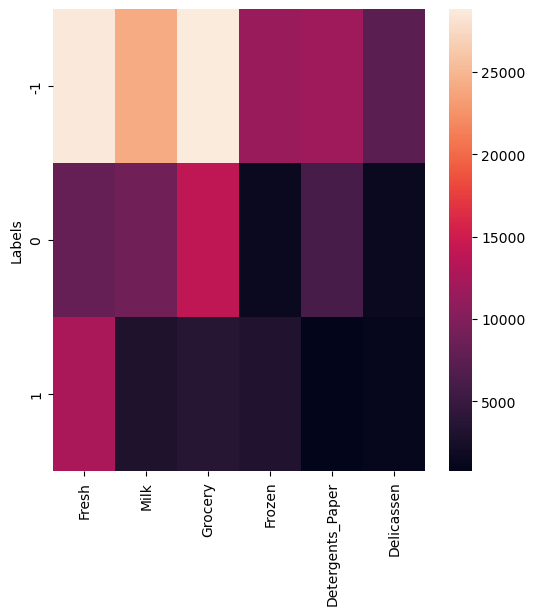

In [38]:
plt.figure(figsize=(6,6),dpi=100)
sns.heatmap(df.drop(['Channel','Region'],axis=1).groupby('Labels').mean())


In [39]:
# What looks to be the main differences here?
# Outliers are being defined by the vast spending amounts that are way higher than other clusters.
# # categories that were pushing these - Fresh, Milk and Grocery.

In [40]:
cat_means = df.drop(['Channel','Region'],axis=1).groupby('Labels').mean()

<Axes: ylabel='Labels'>

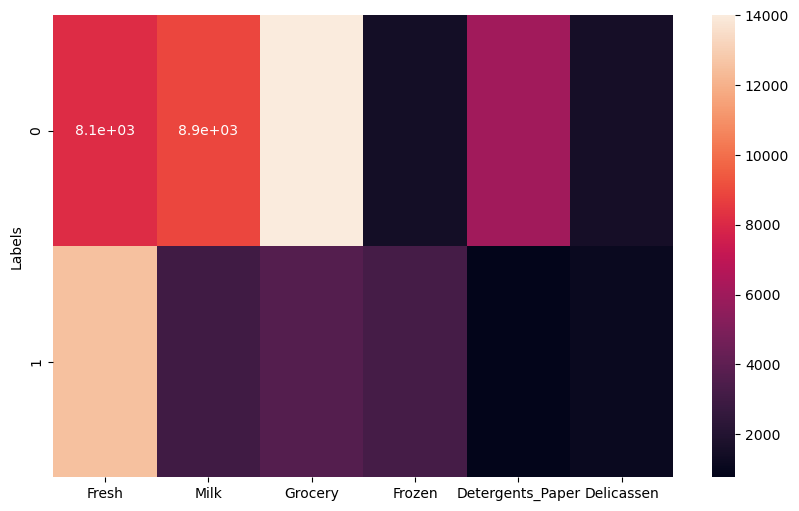

In [41]:
# Just comparing labels 0 and 1.

plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(cat_means.loc[[0,1]],annot=True)


In [42]:
# What are the differences between the two clusters?
# Again spending amount.

Normalizing the dataframe from the previous task using MinMaxScaler so that spending means go from 0-1.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cat_data = scaler.fit_transform(cat_means)

In [44]:
scaled_cat_data

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.27772254, 0.41108925, 0.        , 0.47594865,
        0.06992454],
       [0.21454886, 0.        , 0.        , 0.17271427, 0.        ,
        0.        ]])

In [45]:
pd.DataFrame(data=scaled_cat_data,index=cat_means.index,columns=cat_means.columns)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
1,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000


In [46]:
# Tells us that outliers are highest spenders in every single category
# Cluster 1 is the lowest spender in milk and grocery as well as detergent paper and delicassen

<Axes: ylabel='Labels'>

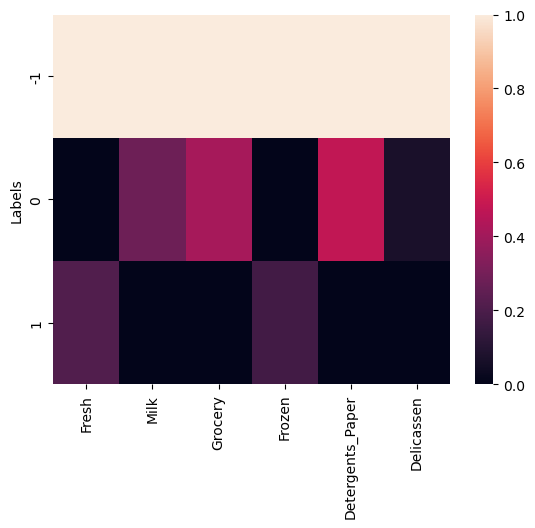

In [47]:
sns.heatmap(pd.DataFrame(data=scaled_cat_data,index=cat_means.index,columns=cat_means.columns))